## Set Options

In [268]:
np.set_printoptions(suppress=True)

## Import necessary libraries

In [269]:
import numpy as np
import random

import matplotlib.pyplot as plt

## Make Bandit Class

In [270]:
class Bandit:
    def __init__(self, p = None):
        self.p = p if p else random.random()
        self.times_succeeded = 0
        self.times_chosen = 0
        self.success_ratio = 0
    
    def choose(self):
        self.times_chosen += 1
        result = random.random() < self.p
        if result:
            self.times_succeeded += 1
        
        self.success_ratio = self.times_succeeded / self.times_chosen
        return result
    
    def reset(self):
        self.times_succeeded = 0
        self.times_chosen = 0
        self.success_ratio = 0

In [271]:
BANDITS = 10
bandits = [Bandit() for _ in range(BANDITS)]

## Implementation of epsilon greedy

In [2]:
def epsilon_greedy(bandits, n, epsilon):
    diff = [sum([abs(bandit.p - bandit.success_ratio) for bandit in bandits])]
    for i in range(n):
        p = random.random()
        if p < epsilon:
            selected_bandit = random.choice(bandits)
        else:
            selected_bandit = sorted(bandits, key=lambda x: x.success_ratio, reverse=True)[0]
        selected_bandit.choose()
        diff.append(sum([abs(bandit.p - bandit.success_ratio) for bandit in bandits]))
    print(diff[-1])
    plt.plot(range(len(diff)), diff, label='True Line', color='blue', linewidth=1)
    plt.scatter(range(len(diff)), diff, color='red', alpha=0.6, s=20)

SyntaxError: invalid syntax (2177865799.py, line 1)

### Test the functionality

0.028528612620382282


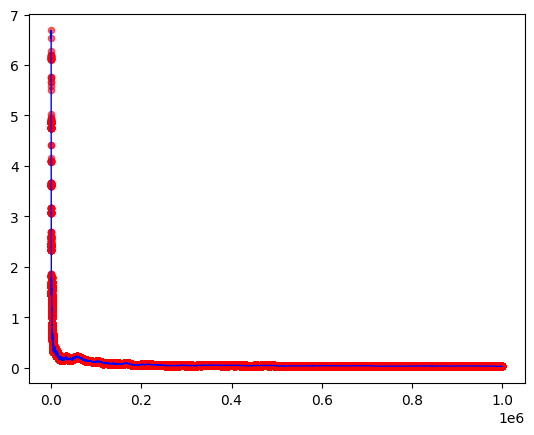

In [273]:
for bandit in bandits:
    bandit.reset()
epsilon_greedy(bandits, 1000000, 0.05)

## Reporing with epsilon set to 5% over 1 Million iterations

In [274]:
for bandit in bandits:
    print(f"Chosen: {str(bandit.times_chosen).ljust(10)}, Succeeded: {str(bandit.times_succeeded).ljust(10)}, Expected: {str(bandit.p).ljust(20)}, Experimented: {str(bandit.success_ratio).ljust(20)}, Difference: {str(abs(bandit.p - bandit.success_ratio)).ljust(20)}")
    
print(f"\nWins: {str(sum([bandit.times_succeeded for bandit in bandits])).ljust(10)} / {str(sum([bandit.times_chosen for bandit in bandits])).ljust(20)}")
print(f"Wins: {str(int(sorted(bandits, key=lambda x: x.success_ratio, reverse=True)[0].p * sum([bandit.times_chosen for bandit in bandits]))).ljust(10)} / {str(sum([bandit.times_chosen for bandit in bandits])).ljust(10)}")
print(f"How close you got to the best result: %{((sum([bandit.times_succeeded for bandit in bandits]) / (sorted(bandits, key=lambda x: x.success_ratio, reverse=True)[0].p * sum([bandit.times_chosen for bandit in bandits]))) * 100):.2f}")

Chosen: 5068      , Succeeded: 2178      , Expected: 0.42048671710416674 , Experimented: 0.4297553275453828  , Difference: 0.009268610441216074
Chosen: 5076      , Succeeded: 3985      , Expected: 0.7892529020251325  , Experimented: 0.7850669818754925  , Difference: 0.004185920149640032
Chosen: 5007      , Succeeded: 3318      , Expected: 0.6642970235958713  , Experimented: 0.6626722588376274  , Difference: 0.0016247647582439129
Chosen: 954827    , Succeeded: 880084    , Expected: 0.9213291536303833  , Experimented: 0.9217208981312845  , Difference: 0.0003917445009012921
Chosen: 4914      , Succeeded: 1381      , Expected: 0.2764296622077209  , Experimented: 0.281033781033781   , Difference: 0.0046041188260601  
Chosen: 5021      , Succeeded: 3986      , Expected: 0.795122433422718   , Experimented: 0.7938657637920733  , Difference: 0.0012566696306447467
Chosen: 4986      , Succeeded: 4359      , Expected: 0.8745994502368801  , Experimented: 0.8742478941034898  , Difference: 0.00035155

## Experiment with different epsilons

6.114589397987567
3.9750729951878494
1.9126785672214992
2.9960602440232083
1.3233962599919709
1.099396356097253
1.8808316852453506
0.5411825835839041
0.8074237539544327
0.8016787967780177
1.8888523782470217
0.44180432677145504
0.5604681279797907
1.0563796275423303
1.2897076147662196
0.5260554119499712
0.42674567946284375
0.7281507807339416
0.5231206400086202
0.8447836735779419
0.37498710850220773
0.5896870690395307
0.5853618693980301
0.7383590484206168
0.7874330786219024
0.54380078467028
0.49358427752974793
0.7160790435244839
0.4608990476091647
0.612446649605439
0.6212373592894369
0.6541059377741713
0.6334176829466286
0.45697480363017373
0.4732297193731805
0.488687633762814
0.5133363187778339
0.4053280222713728
0.47597323552974724
0.5841762589061315
0.47742490320872805
0.4078994158457902
0.298942346842509
0.4718492996081741
0.5302674551089133
0.46305961122895795
0.49813583134584954
0.48947653393477175
0.3851968807558169
0.4011792786127002
0.3803089818684421
0.5676537439135285
0.2424587

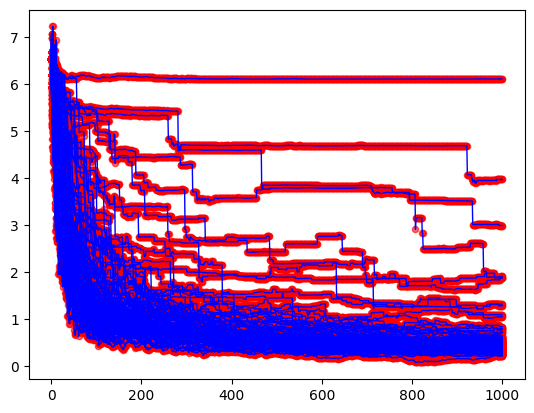

In [275]:
epsilon_results = []
for epsilon_percent in range(101):
    for bandit in bandits:
        bandit.reset()
    epsilon_greedy(bandits, 1000, epsilon_percent / 100)
    epsilon_results.append((sum([bandit.times_succeeded for bandit in bandits]) / (sorted(bandits, key=lambda x: x.success_ratio, reverse=True)[0].p * sum([bandit.times_chosen for bandit in bandits]))) * 100)

[101.54898659836138, 98.1100672969802, 87.37376830289124, 97.04074776240822, 96.17589056580894, 93.6690211744039, 96.2739533970988, 98.0105748788954, 96.49103108232337, 96.38698032244115, 97.53036087193628, 95.94833686926194, 94.32889533334988, 94.32025423007762, 94.86294844313906, 91.28116663693359, 94.32025423007762, 92.25801622044418, 91.60678316477045, 94.64587075791448, 92.58363274828103, 94.32025423007762, 92.36655506305645, 91.17262779432129, 91.17262779432129, 91.9323996926073, 90.95555010909672, 90.52139473864757, 89.29802091557121, 91.9323996926073, 91.69912006951103, 88.24207904378954, 89.00185094207555, 87.48230714550353, 88.89331209946326, 90.62993358125986, 86.72253524721751, 93.12632696134247, 85.31153029325779, 89.54454515513699, 89.00185094207555, 86.61399640460523, 88.13354020117725, 86.72253524721751, 88.35061788640182, 86.28837987676837, 88.02500135856496, 85.09445260803321, 86.50545756199296, 84.44321955235948, 85.52860797848237, 82.48952038533831, 84.5517583949717

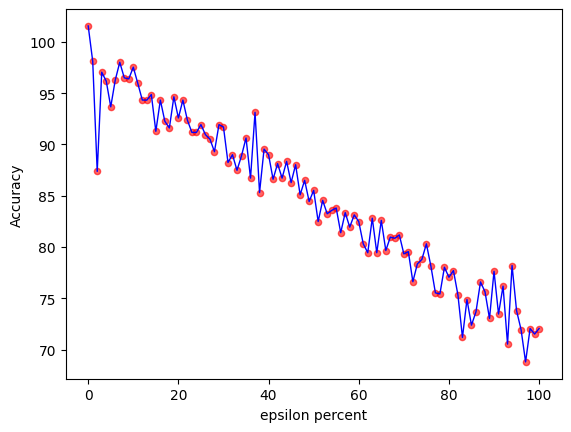

In [276]:
print(epsilon_results)
plt.xlabel("epsilon percent")
plt.ylabel("Accuracy") 
plt.plot(range(len(epsilon_results)), epsilon_results, label='True Line', color='blue', linewidth=1)
plt.scatter(range(len(epsilon_results)), epsilon_results, color='red', alpha=0.6, s=20)

### Result
- The more we increase the epsilon percentage, the more we tend to accept random values, so we lose accuracy to the best we can achieve
- The max reward we can achieve can even be higher than the best success rate between bandits (it's chance)